# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [4]:

import pandas as pd

# List of CSV files to assess
files = ['data/cast.csv', 'data/release_dates.csv', 'data/titles.csv']

for file in files:
    print(f"\n--- Summary for {file} ---")
    
    # Load the CSV
    df = pd.read_csv(file)
    
    # Basic info
    print(f"Number of records: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    
    # Data types
    print("\nData Types:")
    print(df.dtypes)
    
    # Missing values
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # Sample records
    print("\nSample Data:")
    print(df.head(3))
    
    print("\n" + "=" * 50)

    data_set=df.dropna()
    print(data_set)


--- Summary for data/cast.csv ---
Number of records: 3442902
Number of columns: 6

Data Types:
title         object
year           int64
name          object
type          object
character     object
n            float64
dtype: object

Missing Values:
title              6
year               0
name               0
type               0
character          8
n            1327783
dtype: int64

Sample Data:
                 title  year      name   type        character     n
0       Closet Monster  2015  Buffy #1  actor          Buffy 4  31.0
1      Suuri illusioni  1985    Homo $  actor           Guests  22.0
2  Battle of the Sexes  2017   $hutter  actor  Bobby Riggs Fan  10.0

                                                     title  year  \
0                                           Closet Monster  2015   
1                                          Suuri illusioni  1985   
2                                      Battle of the Sexes  2017   
8        Lapis, Ballpen at Diploma, a True to

### 2. How many movies have the title North by Northwest

In [20]:
titles= pd.read_csv('data/titles.csv')
release_date= pd.read_csv('data/release_dates.csv')
cast= pd.read_csv('data/cast.csv')

count = titles[titles['title'].str.lower() == 'north by northwest'.lower()].shape[0]
print(f"Number of movies titled 'North by Northwest': {count}")

Number of movies titled 'North by Northwest': 1


### 3. How many version of Hamlet are there, when was the first made? the last?

In [21]:
titles = pd.read_csv('data/titles.csv')

count = titles[titles['title'].str.lower() == 'hamlet'.lower()].shape[0]
count_ = titles[titles['title'].str.lower() == 'hamlet'.lower()]

first_year = count_['year'].min()
last_year = count_['year'].max()


print(f"Number of version of Hamlet: {count}")
print(f"Year of the first 'Hamlet': {first_year}")
print(f"Year of the last 'Hamlet': {last_year}")


Number of version of Hamlet: 20
Year of the first 'Hamlet': 1910
Year of the last 'Hamlet': 2017


### 4. List all the movies called Treasure Island from oldest to newest

In [22]:
treasure_island = titles[titles['title'] == 'Treasure Island'].sort_values('year')
print(treasure_island)

                  title  year
180911  Treasure Island  1918
108853  Treasure Island  1920
87953   Treasure Island  1934
126321  Treasure Island  1950
190233  Treasure Island  1972
122150  Treasure Island  1973
52099   Treasure Island  1985
36752   Treasure Island  1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [23]:
movies_1950 = titles[titles['year'] == 1950].shape[0]
movies_1980 = titles[titles['year'] == 1980].shape[0]
movies_2000 = titles[titles['year'] == 2000].shape[0]

print(f"Movies made in 1950: {movies_1950}")
print(f"Movies made in 1980: {movies_1980}")
print(f"Movies made in 2000: {movies_2000}")

Movies made in 1950: 1109
Movies made in 1980: 1750
Movies made in 2000: 2568


The data shows a steady increase in movie production over time, suggesting that the film industry has expanded significantly due to advances in technology, higher demand, and easier access to filmmaking resources.

### 6. How big was the cast of Metropolis


In [31]:
Metro_no = titles[titles['title'].str.lower() == 'metropolis'.lower()].shape[0]
Metro = titles[titles['title'].str.lower() == 'metropolis'.lower()]
print(Metro)
print(Metro_no)
print(Metro['year'])

metro_cast = cast[cast['title'].str.lower() == 'metropolis'.lower()]

num_cast = metro_cast.shape[0]

print(f"Number of people in the cast of Metropolis: {num_cast}")



            title  year
90449  Metropolis  1927
1
90449    1927
Name: year, dtype: int64
Number of people in the cast of Metropolis: 33


### 7. How many roles for actors were there 1950's? 1990's

In [32]:
# Roles in the 1950s (1950-1959)
roles_1950s = cast[
    (cast['year'] >= 1950) & 
    (cast['year'] <= 1959) & 
    (cast['type'] == 'actor')
].shape[0]

# Roles in the 1990s (1990-1999)
roles_1990s = cast[
    (cast['year'] >= 1990) & 
    (cast['year'] <= 1999) & 
    (cast['type'] == 'actor')
].shape[0]

print(f"Number of roles for actors in the 1950s (1950-1959): {roles_1950s}")
print(f"Number of roles for actors in the 1990s (1990-1999): {roles_1990s}")

Number of roles for actors in the 1950s (1950-1959): 153559
Number of roles for actors in the 1990s (1990-1999): 245713


### 8. How many roles for actors & actresses over time? Output should be a line graph

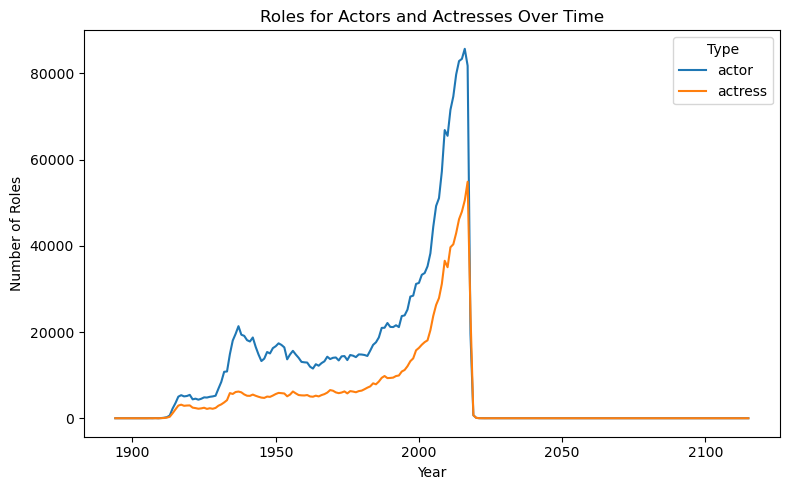

In [33]:
import matplotlib.pyplot as plt

# Count roles for actors and actresses by year
roles_per_year = (
    cast[cast['type'].isin(['actor', 'actress'])]
    .groupby(['year', 'type'])
    .size()
    .unstack(fill_value=0)
)

# Plot
roles_per_year.plot(kind='line', figsize=(8, 5))
plt.title('Roles for Actors and Actresses Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [34]:
# Leading roles are usually where n == 1
leading_roles_2000s = cast[
    (cast['year'].between(2000, 2009)) & (cast['n'] == 1)
]

count = leading_roles_2000s.shape[0]
print("Leading roles in the 2000s:", count)

Leading roles in the 2000s: 23593


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [35]:
# Roles with no ranking (n is null) in 2000s and 1950s
no_rank_2000s = cast[(cast['year'].between(2000, 2009)) & (cast['n'].isna())]
no_rank_1950s = cast[(cast['year'].between(1950, 1959)) & (cast['n'].isna())]

print("No ranking in 2000s:", no_rank_2000s.shape[0])
print("No ranking in 1950s:", no_rank_1950s.shape[0])

No ranking in 2000s: 232037
No ranking in 1950s: 95406


There are usually more unranked roles in the 2000s than in the 1950s, likely because modern films credit many extras and minor roles, while older records captured only main cast members

### 11. Plot the number of films made in each decade

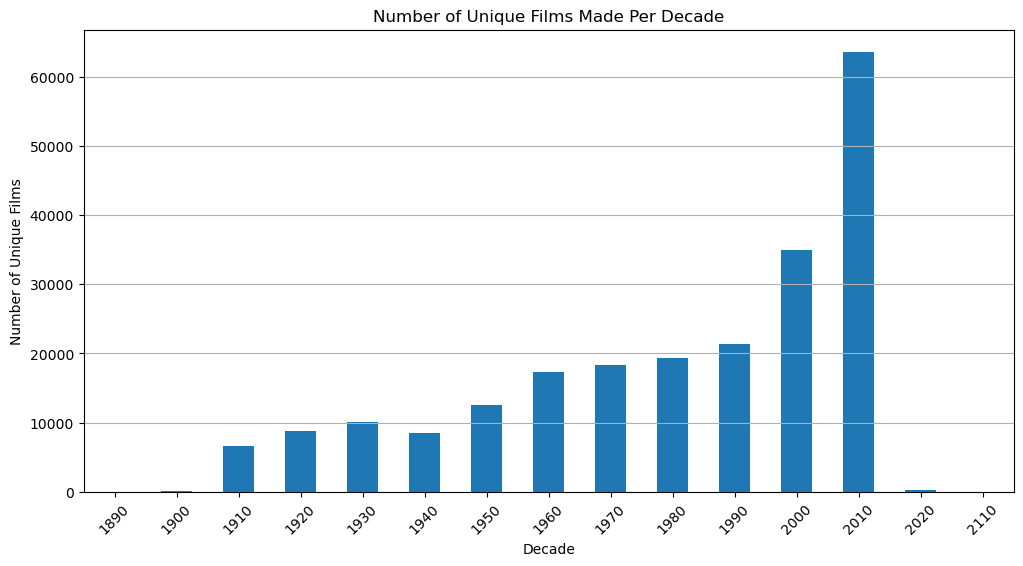

In [36]:
# 1. Calculate the decade for each film
titles['decade'] = (titles['year'] // 10) * 10

# 2. Group by decade and count the number of unique titles
films_by_decade = titles.groupby('decade')['title'].nunique()

# 3. Create the bar plot
plt.figure(figsize=(12, 6))
films_by_decade.plot(kind='bar', title='Number of Unique Films Made Per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Unique Films')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Use plt.show() or simply let the notebook display the output
plt.show()

### 12. Plot the number of films with a Rustler character over time

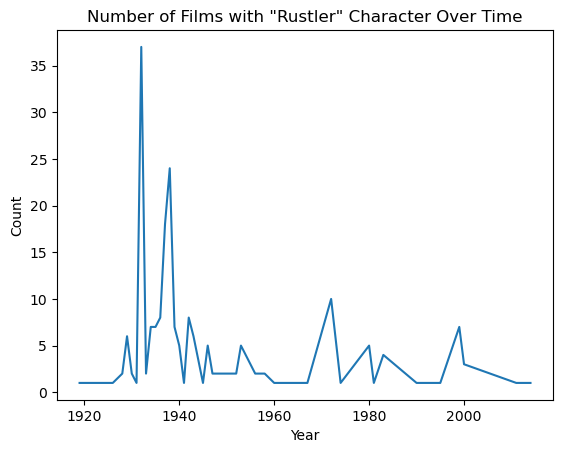

In [37]:
# Filter films with character name 'Rustler'
rustler_films = cast[cast['character'].str.contains('Rustler', case=False, na=False)]

# Count number of films per year
rustler_count = rustler_films.groupby('year').size()

# Plot
rustler_count.plot(kind='line', title='Number of Films with "Rustler" Character Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### 13. What are the top ten character names of all time?

In [38]:
# Use the corrected column name 'character'
top_ten_chars = cast['character'].value_counts().head(10)
print("Top Ten Character Names of All Time:\n", top_ten_chars)

Top Ten Character Names of All Time:
 character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [39]:
# Filter for movies from the 1990s
cast_1990s = cast[(cast['year'] >= 1990) & (cast['year'] < 2000)]

# Find the actor with the most appearances
top_actor = cast_1990s['name'].value_counts().idxmax()
top_count = cast_1990s['name'].value_counts().max()

#value_counts() gives a Series where index = actor name and value = number of appearances.
#idxmax() returns the actor’s name with the highest count (i.e., appeared in the most films).

print(f"{top_actor} appeared in the most films ({top_count}) in the 1990s.")

Shakti Kapoor appeared in the most films (143) in the 1990s.


### 15. What are the top 10 roles that start with Science?

In [40]:
# Filter roles starting with 'Science' and show top 10
science_roles = cast[cast['character'].str.startswith('Science', na=False)]
top_10_science = science_roles['character'].value_counts().head(10)
print(top_10_science)

character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64


### 16. What film has the largest cast

In [45]:
# Find film with the largest cast and its size
cast_size = cast.groupby('title').size()
largest_cast = cast_size.idxmax()
largest_cast_size = cast_size.max()

print(f"Film with largest cast: {largest_cast}")
print(f"Cast size: {largest_cast_size}")

Film with largest cast: Around the World in 80 Days
Cast size: 1364


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [44]:
# Descriptive statistics for cast size
stats = cast_size.describe()
print(stats)

count    168254.000000
mean         20.462491
std          24.206663
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1364.000000
dtype: float64


The mean cast size is about 20.5, while the median (13) confirms a right-skewed distribution,a small number of films with very large casts raise the average.
About 25% of films have 6 or fewer cast members, and 75% have 24 or fewer.
The maximum cast size (1,299) suggests large-scale productions such as historical epics or crowd-heavy scenes.
A standard deviation of ~24.2 highlights significant variation, meaning while most films have small to medium casts, a few outliers have exceptionally large ones.

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [46]:
# 1. Filter for Natalie Portman's roles
natalie_portman_roles = cast[cast['name'] == 'Natalie Portman']

# 2. Group by year and count the number of unique titles (films)
films_per_year_portman = natalie_portman_roles.groupby('year')['title'].nunique()

print("Natalie Portman's Unique Film Count Per Year:\n")
print(films_per_year_portman)

Natalie Portman's Unique Film Count Per Year:

year
1995    1
1996    3
1999    2
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    1
2007    3
2008    1
2009    2
2010    3
2011    3
2013    1
2015    4
2016    3
2017    1
Name: title, dtype: int64


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [47]:
# 2. Filter those roles further for leading/co-star rank (n=1 or n=2)
portman_leading_roles = natalie_portman_roles[
    (natalie_portman_roles['n'] == 1) | 
    (natalie_portman_roles['n'] == 2)
]

# 3. Group by year and count the number of unique titles (films) for these leading roles
leading_films_per_year_portman = portman_leading_roles.groupby('year')['title'].nunique()

print("Natalie Portman's Leading/Co-star Films Per Year:\n")
print(leading_films_per_year_portman)

Natalie Portman's Leading/Co-star Films Per Year:

year
1999    1
2000    1
2002    1
2005    3
2006    1
2007    1
2008    1
2009    1
2010    1
2011    2
2013    1
2015    2
2016    2
Name: title, dtype: int64


### 20. Determine how many roles for actor or actress by decade. Plot the output 

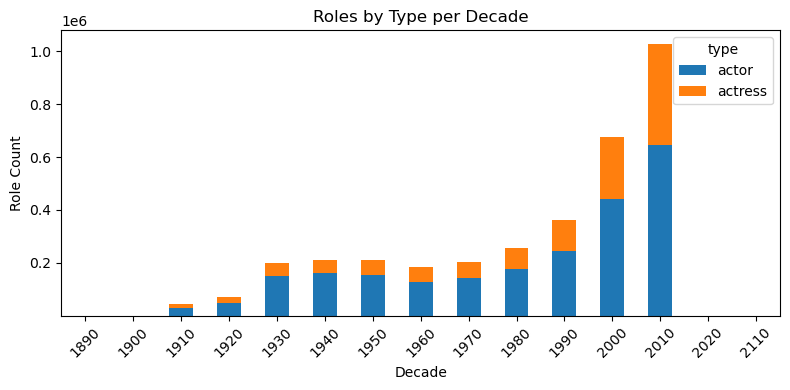

In [49]:
# Add decade column
cast['decade'] = (cast['year'] // 10) * 10

# Group and count by decade/type
counts = cast.groupby(['decade', 'type']).size().unstack(fill_value=0)

# Plot stacked bar chart
ax = counts.plot(kind='bar', stacked=True, figsize=(8, 4), title='Roles by Type per Decade')
ax.set_xlabel('Decade')
ax.set_ylabel('Role Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [56]:
# Convert release_date column to datetime and extract weekday/month
release_date['date'] = pd.to_datetime(release_date['date'])
release_date['weekday'] = release_date['date'].dt.day_name()
release_date['month'] = release_date['date'].dt.month_name()

# Pivot table: count movies by weekday and month
pivot = pd.pivot_table(release_date, index='weekday', columns='month',
                       values='title', aggfunc='count', fill_value=0)

print(pivot)

month      April  August  December  February  January   July   June  March  \
weekday                                                                      
Friday     13559   13430     13020     13833    13734  11635  11997  15268   
Monday      3168    2844      3240      3138     3699   2267   2337   3383   
Saturday    2868    2277      3357      2395     2925   2291   2409   2742   
Sunday      1358    1138      1813      1277     1822    894   1031   1228   
Thursday   10625    9931     10666     10356    10746   8947   9469  11844   
Tuesday     1446    1121      1903      1190     1823   1144   1179   1313   
Wednesday   4650    4270      5097      4118     4663   4243   4282   4479   

month        May  November  October  September  
weekday                                         
Friday     13198     14084    14893      14523  
Monday      3050      3372     3551       3161  
Saturday    2270      2546     2700       2551  
Sunday      1165      1342     1423       1332  
Thu

Notable Insights

-Friday is by far the most common release day for movies in every month. This aligns with industry strategy to maximize weekend box office performance, as Friday releases provide the longest possible opening weekend window for audiences.​

-Thursday is also frequent, often the next highest, especially close to holidays or blockbuster seasons. This pattern is consistent with studios launching “early previews” or midnight releases for major films on Thursday evenings.​

-Saturdays and Sundays have much fewer releases. Most studios avoid weekend releases to focus on marketing for first-week ticket sales. Monday is also low, likely because it’s the start of the workweek and less likely to attract crowds.​

-Seasonal peaks: Summer months (May–August) and the holiday months of November and December show high numbers of Friday releases, reflecting blockbuster and family movie launches during high-attendance periods.​

These patterns demonstrate how studios strategically time releases to take advantage of audience availability and maximize revenue on key days and seasons.

### pivot.T.plot(figsize=(14, 7))
plt.title('Film Releases by Month and Day of Week')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.legend(title='Day of Week')
plt.grid(axis='y')
plt.show()
22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

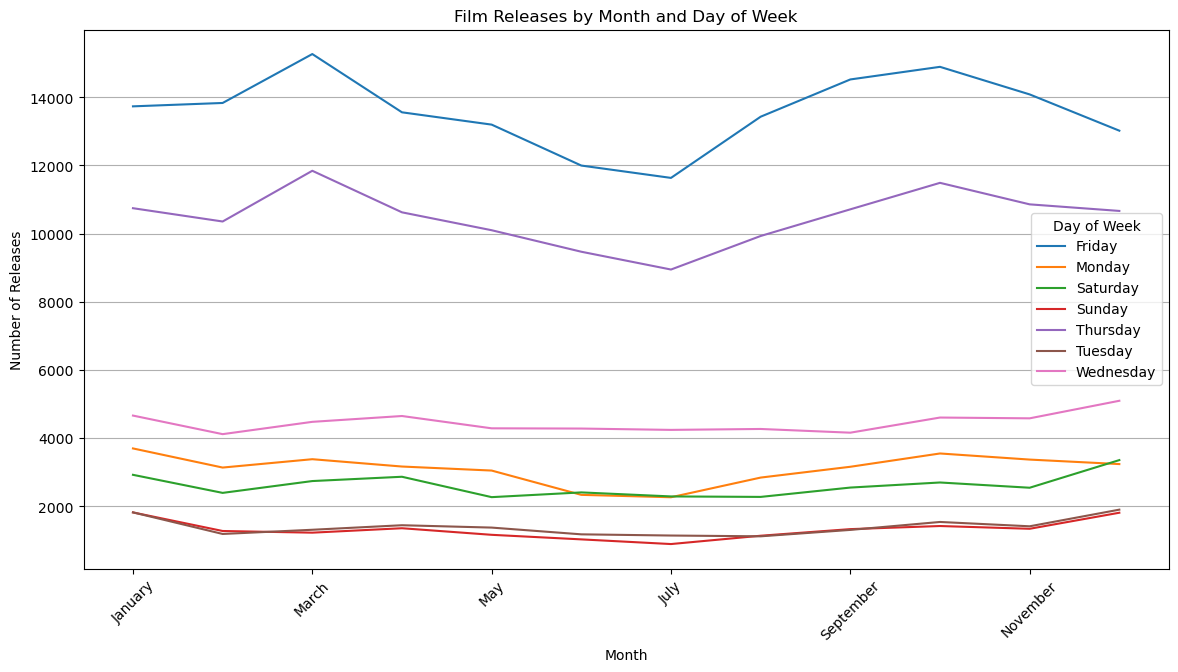

In [61]:


calendar_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
for m in calendar_order:
    if m not in pivot.columns:
        pivot[m] = 0

pivot = pivot[calendar_order]  # Reorder columns
pivot.T.plot(figsize=(14, 7))
plt.title('Film Releases by Month and Day of Week')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.legend(title='Day of Week')
plt.grid(axis='y')
plt.show()

The line chart using pivot.T.plot() isn’t showing all months, it’s likely because the column order is alphabetic rather than calendar sequence, or some columns aren’t visible due to tight layout or missing data.

### 23. What films did actors in Star Wars go on to appear in? 

In [67]:

# Find cast of 1977 Star Wars (actors/actresses)
sw = cast[(cast['title'].str.startswith('Star Wars')) & (cast['year'] == 1977)]
sw_cast = sw.loc[sw['type'].isin(['actor', 'actress']), 'name'].unique()

# Films after 1977, not titled 'Star Wars'
followon = cast[
    (cast['name'].isin(sw_cast)) &
    (cast['type'].isin(['actor', 'actress'])) &
    (cast['year'] > 1977) &
    (~cast['title'].fillna('').str.startswith('Star Wars'))
]

# Unique films and top prolific actors
subsequent = followon[['title', 'year']].drop_duplicates().sort_values('year')
print(subsequent.head())

top_actors = followon.groupby('name')['title'].nunique().sort_values(ascending=False)
print(top_actors.head())

                          title  year
661969   Force 10 from Navarone  1978
281989          A Hitch in Time  1978
263969                 Superman  1978
2124677             Loose Shoes  1978
3185170    International Velvet  1978
name
James Earl Jones    54
Derek Lyons         44
Harry Fielder       43
Harrison Ford       40
Mark Hamill         35
Name: title, dtype: int64
